In [1]:
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
from tensorflow import keras

In [2]:
 !pip install keras-tuner --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 1.8 MB/s eta 0:00:00


In [3]:
fashion_mnist=keras.datasets.fashion_mnist
(xtrain,ytrain),(xtest,ytest)=fashion_mnist.load_data()
xtrain.shape

4422102/4422102 [==============================] - 0s 0us/step


(60000, 28, 28)

0


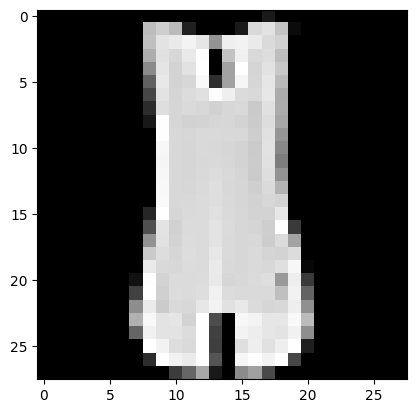

In [4]:
import matplotlib.pyplot as plt
import cv2
print(ytrain[4])
plt.imshow(xtrain[4],cmap='gray')

In [5]:
ytrain


array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

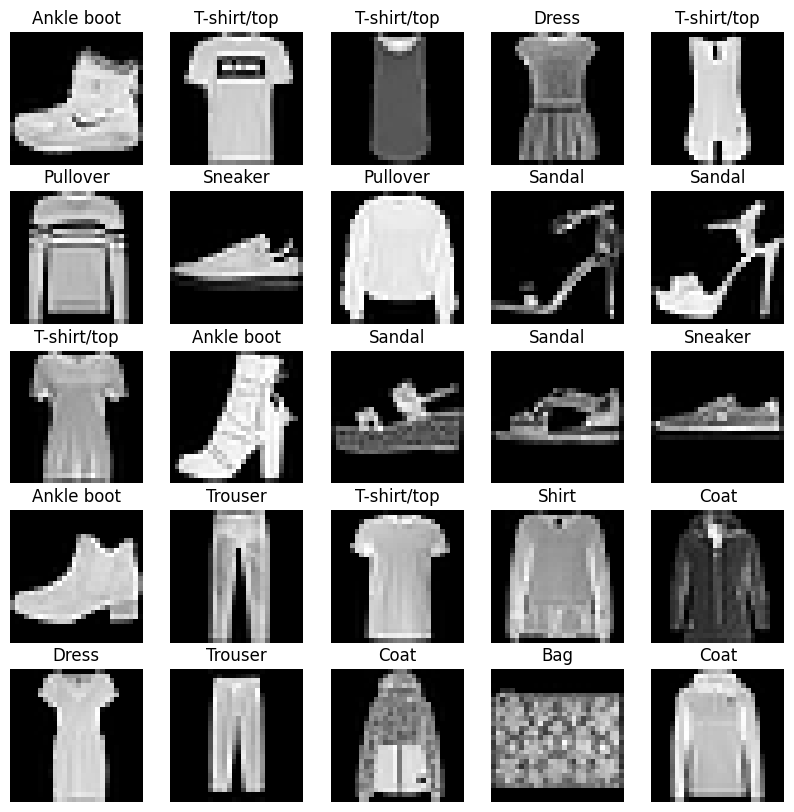

In [6]:
plt.figure(figsize=(10, 10))

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(xtrain[i], cmap="gray")
    plt.title(class_names[ytrain[i]])
    plt.axis("off")

plt.show()

## The training dataset conatins 60000 images,the size of each image is 28 x 28. The labels are from 0 to 9 indicating ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"] respectively

## The test set conatins 10000 images and respective labels

In [7]:
print(xtrain[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

In [8]:
# Scaling the image to the range (0,1)
xtrain=xtrain/255.0
xtest=xtest/255.0
print(xtrain[0])


[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.00392157 0.    

In [9]:
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPool2D,Dropout
from tensorflow.keras.models import Sequential
def build_model(hp):
  model=keras.models.Sequential()
  model.add(Conv2D(
      filters=hp.Int('conv-1 layer',min_value=30,max_value=100,step=10),
      kernel_size=hp.Int('conv-1 kernel',min_value=2,max_value=5),
      activation='relu',
      input_shape=(28,28,1)
  ))
  # model.add(MaxPool2D((2,2)))
  model.add(Conv2D(
      filters=hp.Int('conv-2 layer',min_value=30,max_value=100,step=10),
      kernel_size=hp.Int('conv-2 kernel',min_value=2,max_value=5),
      activation='relu'
  ))
  # model.add(MaxPool2D((2,2)))
  model.add(Flatten())
  model.add(Dense(units=hp.Int('dense 1',min_value=30,max_value=200,step=16),
                  activation='relu',kernel_initializer='he_normal'))
  model.add(Dropout(0.4))
  model.add(Dense(units=10,activation='softmax'))
  model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate',values=[1e-2,1e-3,1e-5])),
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  return model

In [10]:
from keras_tuner import RandomSearch
from keras_tuner.engine.hyperparameters import HyperParameters

In [11]:
tuner=RandomSearch(build_model,objective='val_loss',max_trials=5,directory='mnist-randomsearch3',project_name='fashionmnist3')

In [12]:
tuner.search(xtrain,ytrain,epochs=5,validation_split=0.2)

Trial 5 Complete [00h 00m 43s]
val_loss: 0.3693678677082062

Best val_loss So Far: 0.36756396293640137
Total elapsed time: 00h 03m 55s


In [13]:
model1=tuner.get_best_models(num_models=1)[0]

In [14]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 90)        2340      
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 90)        72990     
                                                                 
 flatten (Flatten)           (None, 43560)             0         
                                                                 
 dense (Dense)               (None, 142)               6185662   
                                                                 
 dropout (Dropout)           (None, 142)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1430      
                                                                 
Total params: 6262422 (23.89 MB)
Trainable params: 62624

In [19]:
model=keras.models.Sequential()
model.add(Conv2D(
     filters=75,
     kernel_size=3,
     activation='relu',
     input_shape=(28,28,1)
))
# model.add(MaxPool2D((2,2)))
model.add(Conv2D(
     filters=80,
     kernel_size=3,
     activation='relu'
))
# model.add(MaxPool2D((2,2)))
model.add(Flatten())
model.add(Dense(units=100,
                 activation='relu',kernel_initializer='he_normal'))
model.add(Dropout(0.4))
model.add(Dense(units=10,activation='softmax'))
model.compile(optimizer=keras.optimizers.Adam(1e-3),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [20]:
model.fit(xtrain,ytrain,epochs=25,validation_split=0.1)

Epoch 1/25
1688/1688 [==============================] - 13s 6ms/step - loss: 0.4570 - accuracy: 0.8381 - val_loss: 0.2880 - val_accuracy: 0.8920
Epoch 2/25
1688/1688 [==============================] - 10s 6ms/step - loss: 0.2933 - accuracy: 0.8936 - val_loss: 0.2546 - val_accuracy: 0.9057
Epoch 3/25
1688/1688 [==============================] - 10s 6ms/step - loss: 0.2378 - accuracy: 0.9125 - val_loss: 0.2454 - val_accuracy: 0.9092
Epoch 4/25
1688/1688 [==============================] - 10s 6ms/step - loss: 0.1922 - accuracy: 0.9289 - val_loss: 0.2437 - val_accuracy: 0.9183
Epoch 5/25
1688/1688 [==============================] - 10s 6ms/step - loss: 0.1580 - accuracy: 0.9414 - val_loss: 0.2390 - val_accuracy: 0.9155
Epoch 6/25
1688/1688 [==============================] - 11s 6ms/step - loss: 0.1309 - accuracy: 0.9516 - val_loss: 0.2509 - val_accuracy: 0.9185
Epoch 7/25
1688/1688 [==============================] - 16s 10ms/step - loss: 0.1114 - accuracy: 0.9581 - val_loss: 0.2827 - val_a

In [21]:
model.evaluate(xtest,ytest)

313/313 [==============================] - 1s 3ms/step - loss: 0.6732 - accuracy: 0.9188


[0.6731714606285095, 0.9187999963760376]

In [22]:
model.save('final-model.h5')